## Capstone Project 1: Data Story

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset source

https://raw.githubusercontent.com/nwugocc/Capstone-Project-1/master/data/data1.txt

In [2]:
df1 = pd.read_csv('data/data1.txt', index_col='yrmo', parse_dates=True).sort_index()
df1.index.name = 'Date'
df1.shape

(42074, 7)

In [3]:
df1.columns = [i.lower() for i in df1.columns]
df1.head()

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,6vFQfkVIyHglLHjv,NaN,NaN,4.0,2439.0,2.0,2.0
2015-01-01,KtIQV9FihhozcS4O,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,nh9P8B7ik2qYlruB,6.0,791.0,9.0,5760.0,3.0,174.0
2015-01-01,1fZbRx3Qm2h2rmPP,NaN,NaN,1.0,97.0,NaN,NaN
2015-01-01,UY8bW4koFtgJI8J7,10.0,16299.0,NaN,NaN,NaN,NaN


In [4]:
test = df1.copy()
test.shape

(42074, 7)

#### Counts for non-null values within medication groups matched except for antobiopayments & antibiopatients 

In [5]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39826 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [6]:
# Imputing the missing antibiopayments values

df1['antibiopayments'][df1['antibiopayments'].isnull() & df1['antibiopatients'].notnull()] = 0
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39829 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Exploratory data analysis with visualizations
While the data was signifcantly right-skewed, there were no unexpected outliers

In [7]:
df1.describe() # Data is significantly right skewed, however, there were no unexpected outliers

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,23889.000000,2.388900e+04,39829.000000,3.982900e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.166645e+04,3.095249,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.379241e+04,6.943019,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,0.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.020000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.906000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430000e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


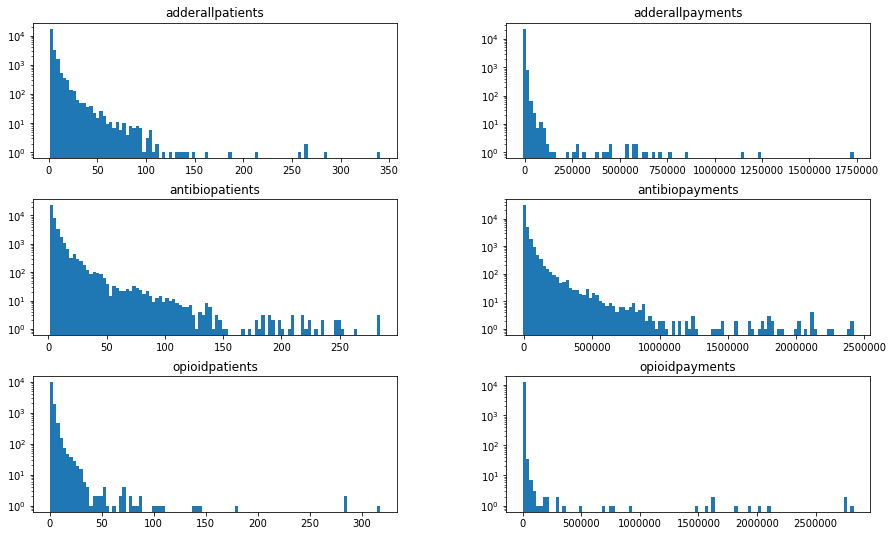

In [8]:
df1.hist(bins=100, figsize=(15,9), grid=False, log=True) ;

Entries for the month of 2017-10 were incomplete and will be excluded from subsequent analyses

In [9]:
df1.groupby('Date').sum().tail() 

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,
2017-06-01,2124.0,517995.0,4613.0,16622137.0,575.0,105434.0
2017-07-01,1656.0,468758.0,4231.0,15072131.0,480.0,92645.0
2017-08-01,1581.0,445137.0,3295.0,10346447.0,530.0,285853.0
2017-09-01,1257.0,350291.0,2604.0,8705042.0,317.0,52527.0
2017-10-01,6.0,1681.0,10.0,690.0,0.0,0.0


### ECDFs and Box plots

In [10]:
# Function to generate x and y values for empirical cummulative density function plots
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

C:\Anaconda\lib\site-packages\pandas\core\base.py:1300: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


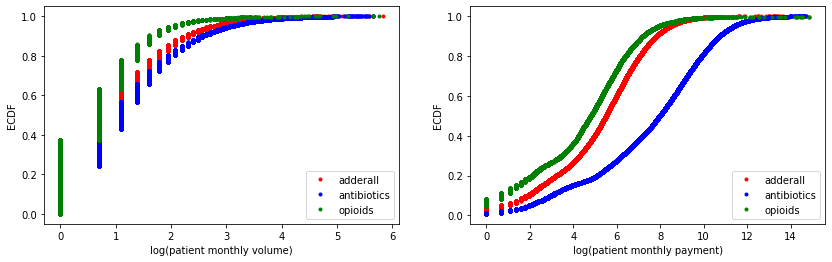

In [11]:
x_add_patients, y_add_patients = ecdf(df1['adderallpatients'].dropna().map(np.log))
x_ant_patients, y_ant_patients = ecdf(df1['antibiopatients'].dropna().map(np.log))
x_opi_patients, y_opi_patients = ecdf(df1['opioidpatients'].dropna().map(np.log))

x_add_payments, y_add_payments = ecdf(np.log(df1['adderallpayments'].dropna()))
x_ant_payments, y_ant_payments = ecdf(np.log(df1['antibiopayments'].dropna()))
x_opi_payments, y_opi_payments = ecdf(np.log(df1['opioidpayments'].dropna()))

fig, axes = plt.subplots(1,2,figsize=(14,4), squeeze=False)
axes[0,0].plot(x_add_patients, y_add_patients, marker='.', linestyle='none', color='r')
axes[0,0].plot(x_ant_patients, y_ant_patients, marker='.', linestyle='none', color='b')
axes[0,0].plot(x_opi_patients, y_opi_patients, marker='.', linestyle='none', color='g')
axes[0,0].legend(('adderall','antibiotics','opioids'), loc='lower right')
axes[0,0].set_xlabel('log(patient monthly volume)')
axes[0,0].set_ylabel('ECDF')

axes[0,1].plot(x_add_payments, y_add_payments, marker='.', linestyle='none', color='r')
axes[0,1].plot(x_ant_payments, y_ant_payments, marker='.', linestyle='none', color='b')
axes[0,1].plot(x_opi_payments, y_opi_payments, marker='.', linestyle='none', color='g')
axes[0,1].legend(('adderall','antibiotics','opioids'), loc='lower right')
axes[0,1].set_xlabel('log(patient monthly payment)')
axes[0,1].set_ylabel('ECDF') ;

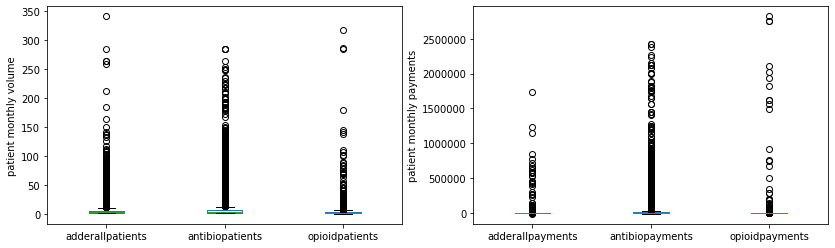

In [12]:
# Unaggregated box plots of patient monthly volumes and payments per physician 
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df1.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
df1.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;

### Time series visualization of patient volume and payments 

In [13]:
# Grouping the data by date. 
df1_d = df1.loc[:'2017-09',:].groupby('Date').sum()

Time series plot of total patients and payments per month for all physicians per drug type shows declining patient volumes for antibiotics and antibiotic payments overtime. However, although the volumes for adderall and opioids patients is declining, the payments seem stationary.

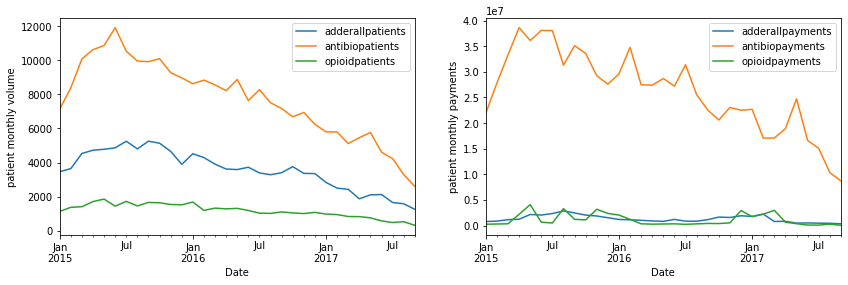

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df1_d.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
df1_d.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;

Box plots of total patients and payments per month for all physicians per drug type shows that the average monthly payments received for opioids was similar to payments received for adderall even though the average monthly patientvolumes for opioids is less than adderall suggesting higher revenue margins from opioids

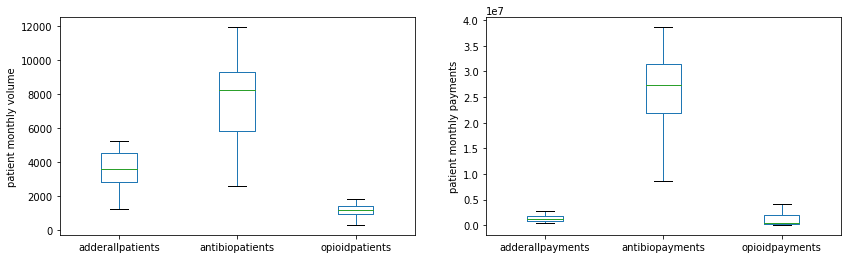

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df1_d.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
df1_d.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;

Covariance matrix of the different variables shows strong correlations between antibiopatients and antibiopayments suggesting no anomalous prescription patterns for antibiotics. However, the poor correlations between adderallpatients and adderallpayments as well as between opioidpatients and opioidpayments, suggests that something other than patient volume was driving the payment patterns for adderall and opioids

In [16]:
df1_d.describe() # Descriptive stats of time series data set

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,33.000000,3.300000e+01,33.000000,3.300000e+01,33.000000,3.300000e+01
mean,3562.878788,1.323731e+06,7697.818182,2.615008e+07,1180.696970,1.136824e+06
std,1135.261032,6.695727e+05,2299.755292,7.857188e+06,391.772453,1.151319e+06
min,1257.000000,3.502910e+05,2604.000000,8.705042e+06,317.000000,5.252700e+04
25%,2834.000000,8.350750e+05,5804.000000,2.194269e+07,979.000000,3.105330e+05
50%,3621.000000,1.163625e+06,8219.000000,2.740240e+07,1188.000000,5.038210e+05
75%,4533.000000,1.870856e+06,9274.000000,3.139256e+07,1453.000000,2.045791e+06
max,5255.000000,2.862942e+06,11918.000000,3.863070e+07,1855.000000,4.092837e+06


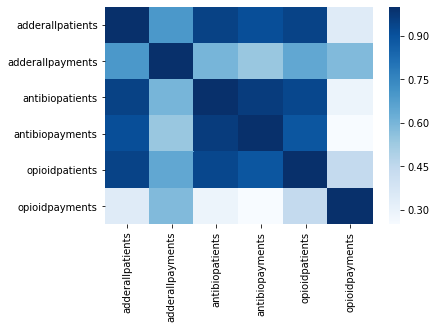

In [17]:
df1_corr = df1_d.corr()
sns.heatmap(df1_corr, cmap='Blues') ;

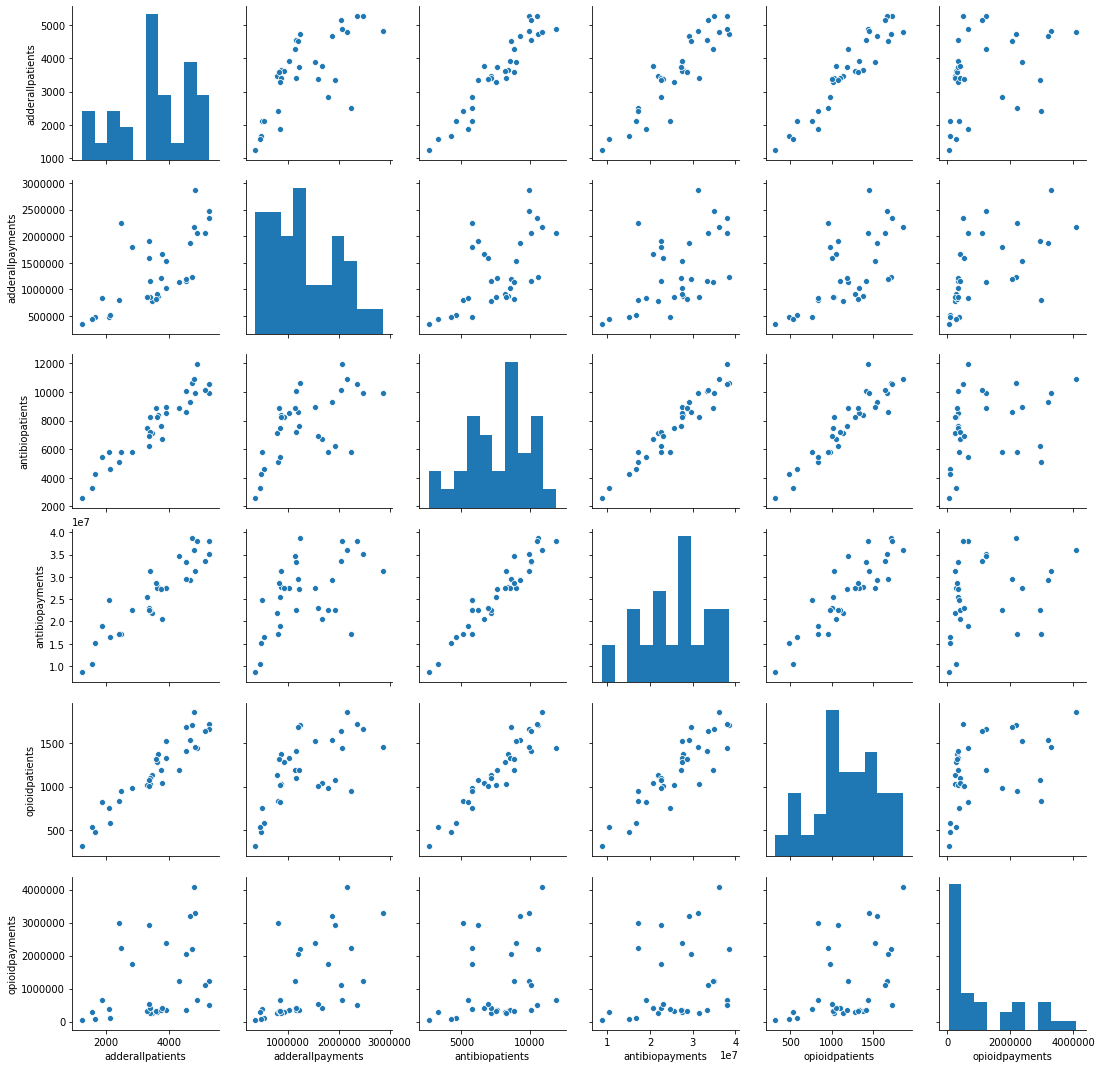

In [18]:
sns.pairplot(df1_d) ; # Showing scatter plots of paired variables

### Investigating payment received per patient per drug type
Investigating the average payments per patient per physician suggests there were more repeat patients for antibiotics and opioids compared to adderall

In [19]:
df1_p = df1.groupby('physicianid').sum() # Sumarizing the dataframe by physicianid
df1_p.shape

(3010, 6)

In [20]:
# Creating three new columns to capture the average payments received per patient per physician per drug type
df1_p['adderall_pay_rate'] = df1_p['adderallpayments'] / df1_p['adderallpatients']
df1_p['antibio_pay_rate'] = df1_p['antibiopayments'] / df1_p['antibiopatients']
df1_p['opioid_pay_rate'] = df1_p['opioidpayments'] / df1_p['opioidpatients']

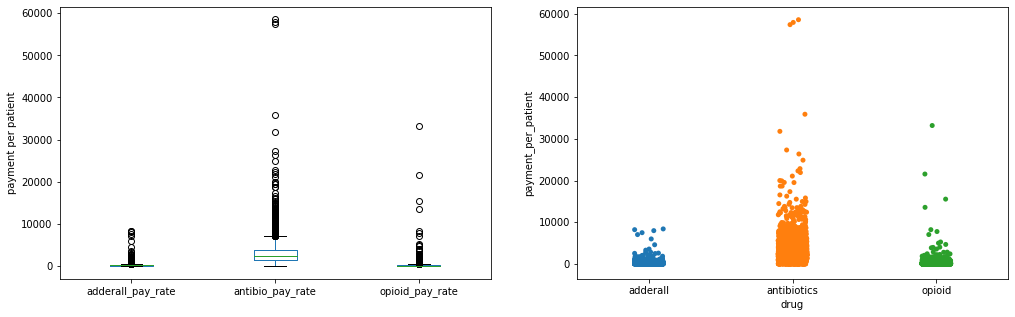

In [21]:
# Box and strip plots to capture the payments received per patient per physician per drug type

fig, axes = plt.subplots(1, 2, figsize=(17,5), squeeze=False)

df1_pmelt = df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']]
df1_pmelt.columns = ['adderall','antibiotics','opioid']
df1_pmelt = df1_pmelt.melt(var_name = 'drug', value_name ='payment_per_patient')
sns.stripplot(x='drug', y='payment_per_patient', data = df1_pmelt, size=5, jitter=True,ax=axes[0, 1])
df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].plot(kind='box', ax=axes[0, 0])
axes[0,0].set_ylabel('payment per patient') ;

In [22]:
# Descriptive stats of payments received per patient per physician per drug type
df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].describe()

,adderall_pay_rate,antibio_pay_rate,opioid_pay_rate
count,2769.000000,2989.000000,2448.000000
mean,242.866021,3086.964647,252.688357
std,436.271818,3225.538837,994.143040
min,-83.066667,0.000000,0.000000
25%,99.333333,1514.247863,61.437500
50%,165.280000,2513.442529,127.470000
75%,257.846154,3779.720000,227.236364
max,8400.000000,58537.333333,33180.888462


### Subsetting the dataframe to further investigate prescription patterns
#### Subset of physicians that prescribed adderall and atleast one other drug type

In [23]:
# Physicians that prescribed adderall and atleast one other drug type
adderall_phys_other = df1[df1['adderallpatients'].notnull() & (df1['antibiopatients'].notnull() | df1['opioidpatients'].notnull())]
adderall_phys_other.shape

(23856, 7)

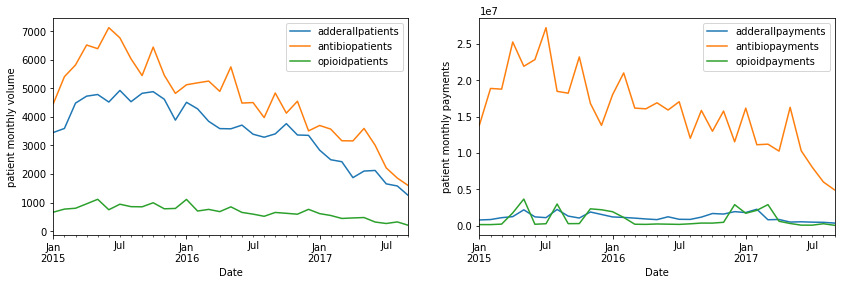

In [24]:
adderall_phys_other = adderall_phys_other.loc[:'2017-09',:].groupby('Date').sum()
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
adderall_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;

Box plots of total patients and payments per month for physicians that prescribed adderall and atleast one other drug type suggest an even higher revenue margin from opioids compared to adderall

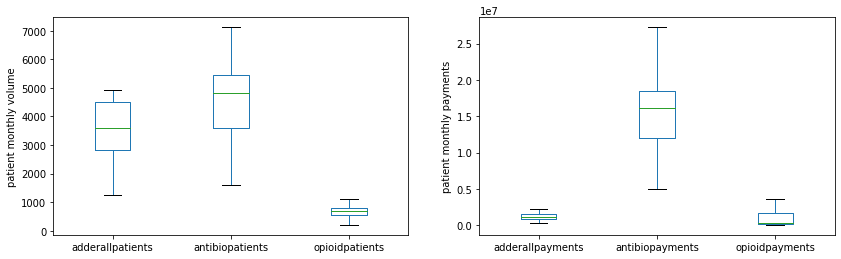

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
adderall_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;

Closer look at adderallpyaments and opioidpayments for physicians prescribed adderall and atleast one other drug

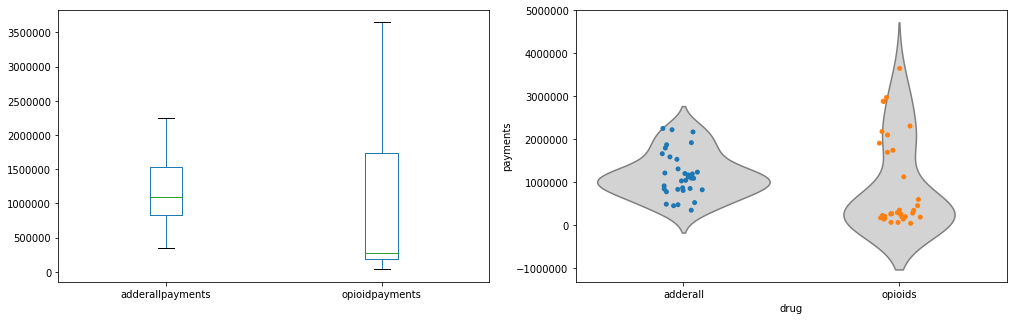

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(17,5), squeeze=False)

adderall_other_melt = adderall_phys_other.loc[:,['adderallpayments','opioidpayments']]
adderall_other_melt.columns = ['adderall', 'opioids']
adderall_other_melt = adderall_other_melt.melt(var_name = 'drug', value_name ='payments')
sns.violinplot(x='drug', y='payments', data = adderall_other_melt, inner=None, color='lightgray', ax=axes[0, 1])
sns.stripplot(x='drug', y='payments', data = adderall_other_melt, size=5, jitter=True, ax=axes[0, 1])
adderall_phys_other.loc[:,['adderallpayments','opioidpayments']].plot(kind='box', ax=axes[0, 0]) ;

#### Subset of physicians that prescribed opioids and atleast one other drug type

In [27]:
# Physicians that prescribed opioids and atleast one other drug type
opioid_phys_other = df1[df1['opioidpatients'].notnull() & (df1['antibiopatients'].notnull() | df1['adderallpatients'].notnull())]
opioid_phys_other.shape

(11898, 7)

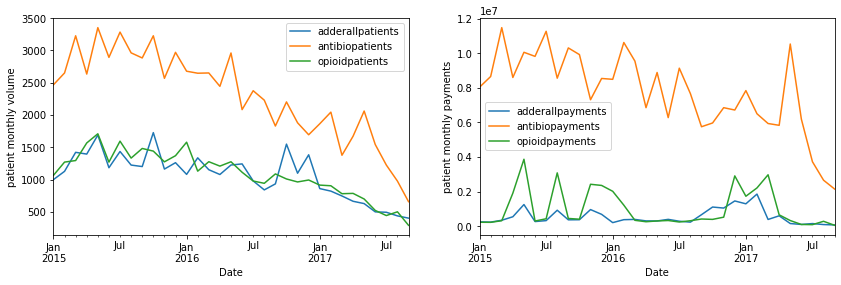

In [28]:
opioid_phys_other = opioid_phys_other.loc[:'2017-09',:].groupby('Date').sum()
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
opioid_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
opioid_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])
axes[0,0].set_ylabel('patient monthly volume')
axes[0,1].set_ylabel('patient monthly payments') ;